In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants 
from scipy.optimize import curve_fit
#### PLOT THE DATA #######
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 28
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [2]:
from ion_properties import lead


Also plot dp/p

min laser_offset transverse: -1.2416107382550332
min laser offset longitudinal: 0.5033557046979871


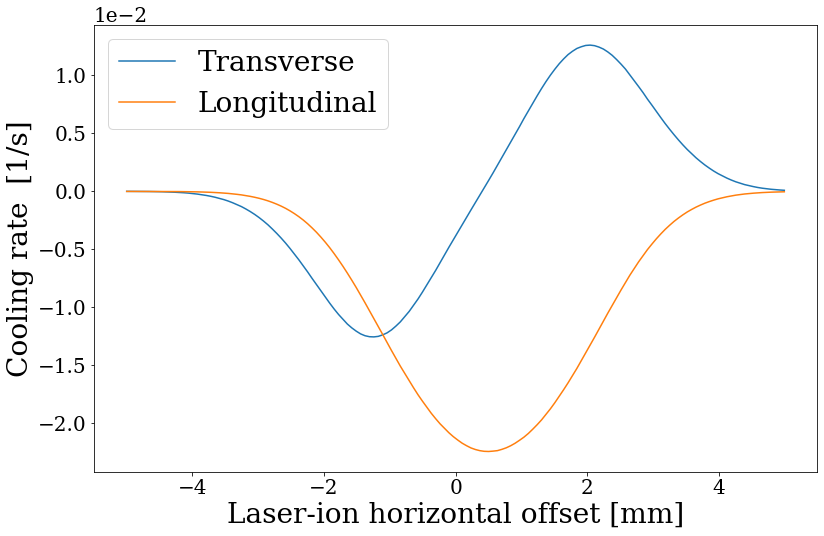

In [3]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for ion_loop in [lead]:# Ion properties:       
    data = np.load(f'results/optimal_laser_x/{ion_loop.name}.npz')

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    ######################################################################
    # Find laser position with minimal final emittance

    min_index = np.argmin(final_emittance_list)
    min_emittance = final_emittance_list[min_index]
    min_laser_offset_transverse = laser_x_list[min_index]

    min_longitudinal_index = np.argmin(final_dp_p)
    min_laser_offset_longitudinal = laser_x_list[min_longitudinal_index]

    print('min laser_offset transverse:',min_laser_offset_transverse*1e3)    
    print('min laser offset longitudinal:',min_laser_offset_longitudinal*1e3)    
    
    
    plt.plot(laser_x_list*1e3,transverse_growth_rate_list,label=f'Transverse',color=cycle[0])
    plt.plot(laser_x_list*1e3,longitudinal_growth_rate_list,label=f'Longitudinal',color=cycle[1])
    
    plt.xlabel('Laser-ion horizontal offset [mm]')
    plt.ylabel('Cooling rate  [1/s]')
    ax = plt.gca()
    # Removing the offset from the y-axis tick labels
    ax.yaxis.get_major_formatter().set_useOffset(False)
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    # plt.axvline(-1.3758389261744963*1e-3,color='red',label='opt. transverse cooling')
    #plt.axvline(-0.5033557046979862*1e-3,color='black',label='counteract IBS')
    plt.legend()
    # plt.ylim([-0.36,0.35])
plt.tight_layout()
plt.savefig('figures/Optimal_laser_offset.png', dpi=300)
plt.show()